In [12]:
import pandas as pd 
import plotly.express as px


In [13]:
# READ UNEMP RATE DATA
dfu = pd.read_csv('unemprate_2_7_22.csv',parse_dates=["observation_date"])
dfu = dfu.rename(columns={"observation_date": "Date", "LNS14000006": "Black","LNS14000003": "White","LNS14032183":"Asian","LNS14000009":"Hispanic"})
print(dfu.head())

# CONVERT FROM WIDE TO LONG FORMAT FOR PLOTTING
dfu = pd.melt(dfu, id_vars='Date', value_vars=dfu.columns[1:],value_name ='Unemployment Rate',var_name="Race")
print(dfu.head())
                          
# SET DATES FOR GREAT RECESSION, COVID RECESSION, AND COVID SAMPLE PERIOD
# GREAT RECESSION
gr_dates = [0,1]
gr_dates[0] = "2007-12-01"; gr_dates[1] = "2009-06-01"
# COVID RECESSION
cr_dates = [0,1]
cr_dates[0] = "2020-02-01"; cr_dates[1] = "2020-04-01"
# POST-COVID PERIOD
pcovid_dates = [0,1]
pcovid_dates[0] = "2020-04-01"; pcovid_dates[1] = "2021-05-01"

        Date  Black  White  Asian  Hispanic
0 1973-03-01    9.4    4.4    NaN       7.3
1 1973-04-01    9.9    4.5    NaN       7.9
2 1973-05-01    9.6    4.3    NaN       8.1
3 1973-06-01    9.8    4.3    NaN       7.9
4 1973-07-01    9.8    4.2    NaN       7.2
        Date   Race  Unemployment Rate
0 1973-03-01  Black                9.4
1 1973-04-01  Black                9.9
2 1973-05-01  Black                9.6
3 1973-06-01  Black                9.8
4 1973-07-01  Black                9.8
        Date  Black  White  Asian  Hispanic
0 2000-01-01    276    346    355       235
1 2000-04-01    277    341    357       229
2 2000-07-01    271    339    361       233
3 2000-10-01    276    345    354       230
4 2001-01-01    275    345    348       232
        Date   Race  Weekly Earnings
0 2000-01-01  Black              276
1 2000-04-01  Black              277
2 2000-07-01  Black              271
3 2000-10-01  Black              276
4 2001-01-01  Black              275


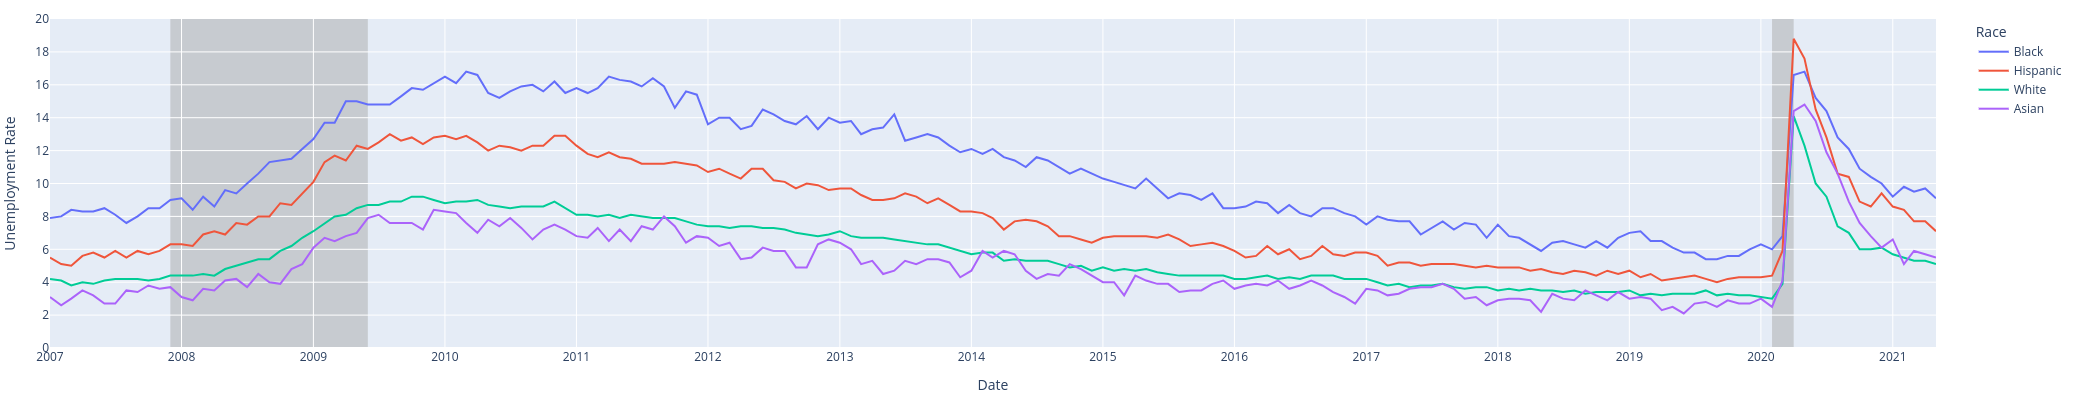

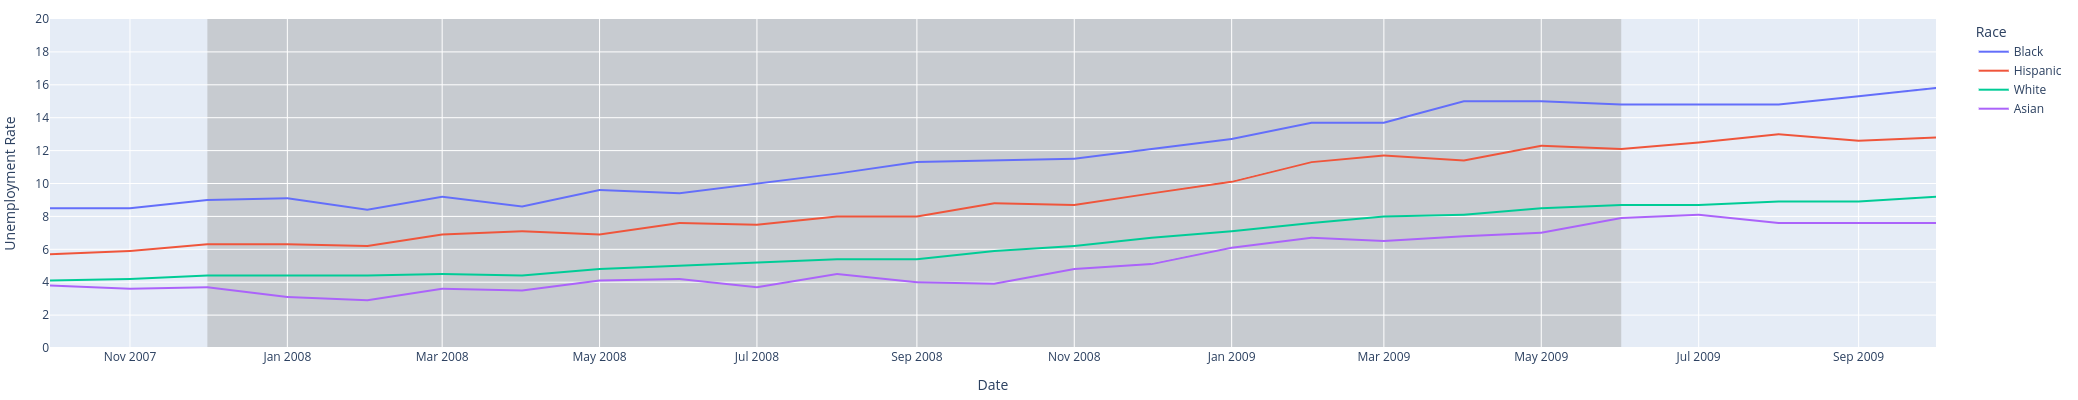

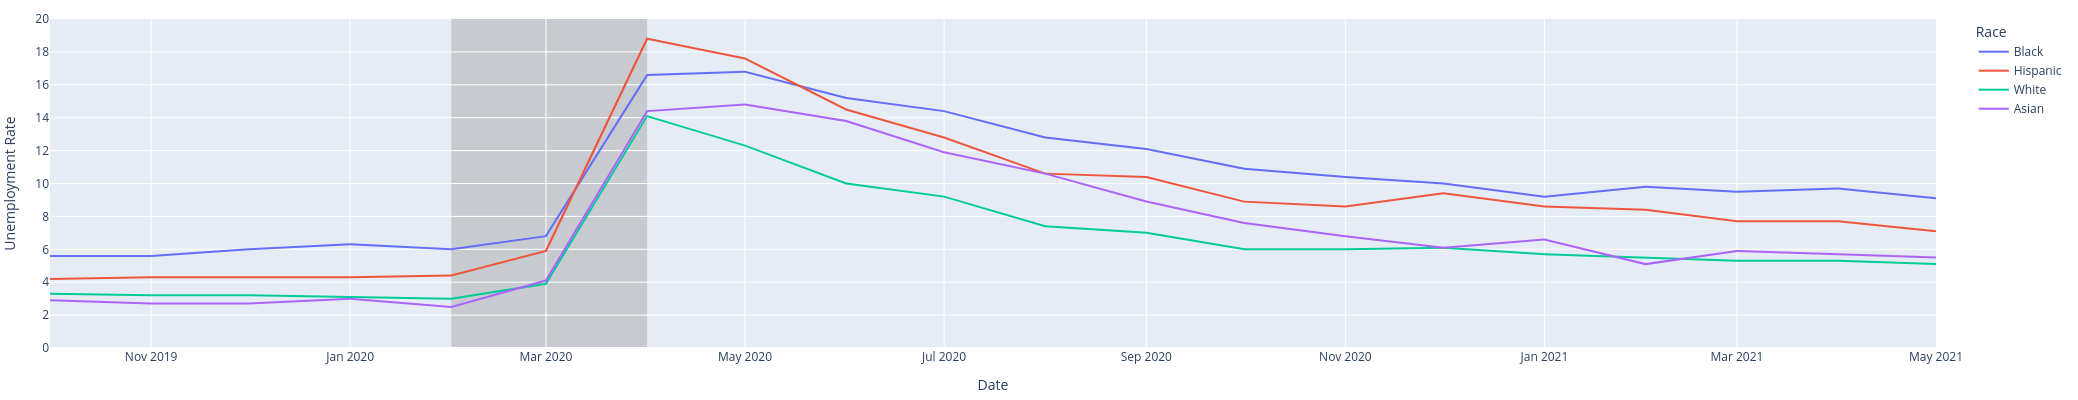

In [18]:
# UNEMPLOYMENT BY RACE: 2007-PRESENT
# data range for plots
plotdf = dfu.loc[(dfu['Date']>='2007-01-01') & ( dfu['Date']<='2021-05-01')].copy()
# PLOTLY THEME LIST: ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
fig = px.line(plotdf,x="Date",y="Unemployment Rate",color="Race", template="plotly",
             width=1000, height=400, 
             category_orders={"Race": ["Black", "Hispanic", "White", "Asian"]})
#fig.update_yaxes(nticks=10)
fig.update_yaxes(range=[0, 20],nticks=11)
fig.update_xaxes(nticks=18)
fig.update_layout(margin=dict(l=20, r=10, t=10, b=20) )
# SHADE GREAT RECESSION
fig.add_vrect(
    x0=gr_dates[0], x1=gr_dates[1],
    fillcolor="DarkGrey", opacity=0.5,
    layer="below", line_width=0,
)
# SHADE POST COVID PERIOD

fig.add_vrect(
    x0=cr_dates[0], x1=cr_dates[1],
    fillcolor="DarkGrey", opacity=0.5,
    layer="below", line_width=0,
)
# WRITE TO PDF AND INTERACTIVE HTML
fig.write_image("images/fig_unemp_time.pdf")
fig.write_html("images/fig_unemp_time.html")
fig.show()

# SUBPLOT FOR GREAT RECESSION
plotdf = dfu.loc[(dfu['Date']>='2007-10-01') & ( dfu['Date']<='2009-10-01')].copy()
# PLOTLY THEME LIST: ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
fig = px.line(plotdf,x="Date",y="Unemployment Rate",color="Race", template="plotly", 
             width=1000, height=400, 
             category_orders={"Race": ["Black", "Hispanic", "White", "Asian"]})
#fig.update_yaxes(nticks=10)
fig.update_yaxes(range=[0, 20],nticks=11)
fig.update_xaxes(nticks=18)
fig.update_layout(margin=dict(l=20, r=10, t=10, b=20) )

# SHADE GREAT RECESSION
fig.add_vrect(
    x0=gr_dates[0], x1=gr_dates[1],
    fillcolor="DarkGrey", opacity=0.5,
    layer="below", line_width=0,
)

# WRITE TO PDF AND INTERACTIVE HTML
fig.write_image("images/fig_unemp_GR.pdf")
fig.write_html("images/fig_unemp_GR.html")
fig.show()

# SUBPLOT FOR COVID
plotdf = dfu.loc[(dfu['Date']>='2019-10-01') & ( dfu['Date']<='2021-05-01')].copy()
# PLOTLY THEME LIST: ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
fig = px.line(plotdf,x="Date",y="Unemployment Rate",color="Race", template="plotly",
             width=1000, height=400,
             category_orders={"Race": ["Black", "Hispanic", "White", "Asian"]})
#fig.update_yaxes(nticks=10)
fig.update_yaxes(range=[0, 20],nticks=11)
fig.update_xaxes(nticks=18)
fig.update_layout(margin=dict(l=20, r=10, t=10, b=20) )

fig.add_vrect(
    x0=cr_dates[0], x1=cr_dates[1],
    fillcolor="DarkGrey", opacity=0.5,
    layer="below", line_width=0,
)

# WRITE TO PDF AND INTERACTIVE HTML
fig.write_image("images/fig_unemp_COVID.pdf")
fig.write_html("images/fig_unemp_COVID.html")
fig.show()
